# Project on Cross-validation (for Logistic Regression Classification)
## by Vinay Kumar Ranganath Babu

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

admissions.head(10)

,gpa,gre,actual_label
0,3.177277,594.102992,0
1,3.412655,631.528607,0
2,2.728097,553.714399,0
3,3.093559,551.089985,0
4,3.141923,537.184894,0
5,3.599108,442.763567,0
6,3.238972,667.472189,0
7,3.420177,561.713905,0
8,3.562482,590.340371,0
9,3.910495,463.470183,0


# Holdout Validation

In [24]:
np.random.seed(8)
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]

train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]

shuffled_admissions.head()

,gpa,gre,actual_label
260,3.414036,577.665610,0
173,2.932147,564.798764,0
256,2.674040,599.895858,0
167,2.923581,622.524665,0
400,3.414376,704.934217,1


# Accuracy

In [25]:
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])

labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels

matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)
print(accuracy)

0.6744186046511628


/home/vinay/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The prediction accuracy is about 63.6%

# Sensitivity And Specificity

In [26]:
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_negatives = len(test[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)

false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 0)
true_negatives = len(test[true_negative_filter])

specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.19148936170212766
0.9512195121951219


/home/vinay/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# ROC Curve

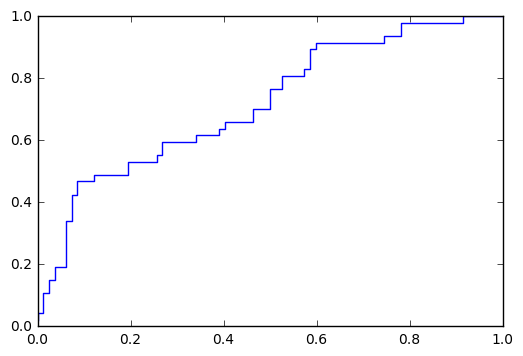

In [27]:
probabilities = model.predict_proba(test[["gpa"]])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:,1])
plt.plot(fpr, tpr)

# Area Under The Curve (AUC)

In [28]:
# Means we can just use roc_auc_curve() instead of metrics.roc_auc_curve()
auc_score = roc_auc_score(test["actual_label"], probabilities[:,1])
print(auc_score)

0.721069019201
